In [1]:
import sys

if r'D:\Workspace\Pedestrian-Dead-Reckoning' not in sys.path:
    sys.path.append(r'D:\Workspace\Pedestrian-Dead-Reckoning')

In [2]:
from pedestrian_data import PedestrianDataset, PedestrianLocus

In [3]:
dataset = PedestrianDataset(["Magnetometer"], window_size=200)

for name, locus in dataset:
    print("正在遍历移动轨迹{}... \n".format(name))

    for sample in locus:
        for k, v in sample.items():
            print(k + ":" + str(v.shape))
        break

    print(locus.columns_info())
    break

正在遍历移动轨迹NorthEastSouthWest... 

Accelerometer:(200, 4)
Gyroscope:(200, 4)
Magnetometer:(200, 4)
Linear Acceleration:(200, 4)
Location:(200, 11)
{'Accelerometer': Index(['Time (s)', 'Accelerometer.Acceleration x (m/s^2)',
       'Accelerometer.Acceleration y (m/s^2)',
       'Accelerometer.Acceleration z (m/s^2)'],
      dtype='object'), 'Gyroscope': Index(['Time (s)', 'Gyroscope.Gyroscope x (rad/s)',
       'Gyroscope.Gyroscope y (rad/s)', 'Gyroscope.Gyroscope z (rad/s)'],
      dtype='object'), 'Magnetometer': Index(['Time (s)', 'Magnetometer.Magnetic field x (µT)',
       'Magnetometer.Magnetic field y (µT)',
       'Magnetometer.Magnetic field z (µT)'],
      dtype='object'), 'Linear Acceleration': Index(['Time (s)', 'Linear Acceleration.Linear Acceleration x (m/s^2)',
       'Linear Acceleration.Linear Acceleration y (m/s^2)',
       'Linear Acceleration.Linear Acceleration z (m/s^2)'],
      dtype='object'), 'Location': Index(['location_time', 'Latitude (°)', 'Longitude (°)', 'Hei

In [4]:
from numpy import arctan2, pi
import numpy as np

@np.vectorize
def caculate_theta(x, y):
    return pi -arctan2(y, x);

@np.vectorize
def caculate_gamma(x, y, z):
    return arctan2(z, np.sqrt(x * x + y * y));

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def simulate_rotation(locus_name):
    locus0 = dataset[locus_name]
    # frame = locus0.frame.dropna()[[*locus.columns_info()["Magnetometer"], r"Direction (°)"]]
    magnetometer_frame = pd.DataFrame(locus0.x_frame[locus.columns_info()["Magnetometer"]])
    gyroscope_frame = pd.DataFrame(locus0.x_frame[locus.columns_info()["Gyroscope"]])
    
    magnetometer_frame.columns = ["time", "x", "y", "z"]
    gyroscope_frame.columns = ["time", "wx", "wy", "wz"]
    
    np.cumsum(gyroscope_frame["wz"][1:-1].to_numpy() * (gyroscope_frame["time"][2:].to_numpy() - gyroscope_frame["time"][:-2].to_numpy()) / 2)
    z_direction = np.cumsum(gyroscope_frame["wz"][1:-1].to_numpy() * (gyroscope_frame["time"][2:].to_numpy() - gyroscope_frame["time"][:-2].to_numpy()) / 2)
    
    magnetometer_frame["theta"] = caculate_theta(magnetometer_frame["x"], magnetometer_frame["y"])
    magnetometer_frame["gamma"] = caculate_gamma(magnetometer_frame["x"], magnetometer_frame["y"], magnetometer_frame["z"])
    
    fig, axs = plt.subplots(1, 3, subplot_kw={'projection': 'polar'})
    axs[0].plot(magnetometer_frame["theta"], magnetometer_frame["time"])
    axs[0].set_title("magnetometer", va='bottom')
    axs[0].grid(True)

    # 我是从正北开始的，所以选择了 pi/2
    axs[1].plot(np.mean(magnetometer_frame["theta"][:20]) + z_direction, gyroscope_frame["time"][1:-1])
    axs[1].set_title("gyroscope", va='bottom')
    axs[1].grid(True)

    axs[2].plot(pi/2 + z_direction, gyroscope_frame["time"][1:-1])
    axs[2].set_title("gyroscope", va='bottom')
    axs[2].grid(True)
    plt.show()

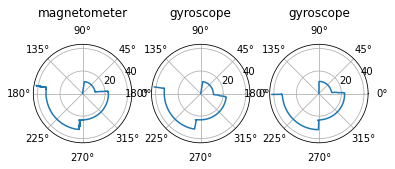

In [6]:
simulate_rotation("NorthEastSouthWest")

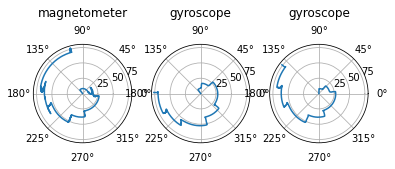

In [7]:
simulate_rotation("水平面(北东南西)")

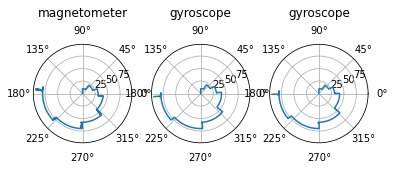

In [8]:
simulate_rotation("水平面(北东南西，加入扰动)")

In [9]:
# plt.plot(gyroscope_frame["time"], gyroscope_frame["wz"], label="wz")
# plt.plot(gyroscope_frame["time"], gyroscope_frame["wx"], label="wx")
# plt.plot(gyroscope_frame["time"], gyroscope_frame["wy"], label="wy")
# plt.legend()

In [10]:
locus0 = dataset["NorthEastSouthWest"]
locus0.y_frame

,location_time,Latitude (°),Longitude (°),Height (m),Velocity (m/s),Direction (°),Horizontal Accuracy (m),Vertical Accuracy (m),relative_x (m),relative_y (m),nearest_time
0,0.000000,32.117213,118.954206,0.000000,0.0,0.0,71.373077,0.000000,158.867868,7.962037,0.000000
1,5.104597,32.115844,118.954158,-11.303039,0.0,0.0,37.732033,81.260323,7.015567,3.460388,5.103945
2,6.103712,32.115740,118.954204,-26.567876,0.0,0.0,29.038570,64.471329,4.450339,7.773289,6.104643
3,7.104929,32.115757,118.954003,5.559201,0.0,0.0,24.708179,55.480049,2.565228,11.233677,7.105344
4,8.106410,32.115945,118.954019,29.669231,0.0,0.0,17.531830,35.531605,18.307378,9.714252,8.106045
5,9.105055,32.115995,118.954028,39.504433,0.0,0.0,14.776095,30.578880,23.800811,8.798822,9.104736
6,10.103518,32.115958,118.954033,35.987321,0.0,0.0,12.732715,26.475472,19.754477,8.317513,10.103429
7,11.103773,32.115941,118.954058,29.559959,0.0,0.0,11.322941,22.574810,17.802833,5.967596,11.104132
8,12.103817,32.115939,118.954058,31.267354,0.0,0.0,9.908322,19.562243,17.584382,5.986471,12.102828
9,13.105219,32.115949,118.954057,29.793805,0.0,0.0,8.320780,16.510265,18.750933,6.099720,13.105545
